In [1]:
import numpy as np
# numpy는 수치계산, 벡터 및 행렬계산에 유용하게 사용된다. 약어로 np라고 지칭.
import matplotlib.pyplot as plt
# Matplotlib는 데이터를 차트나 플롯(plot)으로 시각화하는 패키지이다. Matplotlib의 주요 모듈인 pyplot. 약어로 plt라고 지칭.
import pandas as pd
# pandas는 csv, 텍스트, Excel,SQL, HTML, JSON등 다양한 데이터 파일을 읽을 수 있다. 약어로 pd라고 지칭.

In [118]:
data = pd.read_csv("Uni_linear.txt", header=None)
# header가 없고, Uni_linear.txt를 불러온 것을 data에 저장.
# 텍스트 파일은 read_csv 함수를 이용해서 불러올 수 있다. header(헤더)가 없는 경우 header=None 사용(기본 구분자는 쉼표).

In [3]:
data.head()
# Uni_linear.txt 파일의 앞부분(기본 5줄) 데이터를 보여준다.

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()
# Uni_linear.txt 파일의 데이터의 컬럼별 요약 통계량을 보여준다.

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

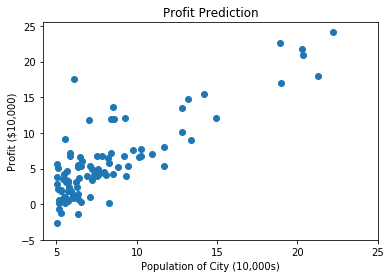

In [5]:
plt.scatter(data[0], data[1])
# 산점도를 그릴때 scatter함수를 사용. scatter함수에 두개의 데이터를 넘겨주면 각각 x축과 y축의 데이터로 인식함.
# x축의 데이터 = data[0], y축의 데이터 = data[1](data[0]와 data[1]은 Uni_linear.txt파일의 각각 첫번째 열데이터들(97개)과 두번째 열데이터들(97개)에 해당됨)
plt.xticks(np.arange(5, 30, step=5))
# x축에 눈금을 표시하는데, 5부터 30까지 5간격으로 표시한다.(30은 제외)
plt.yticks(np.arange(-5, 30, step=5))
# y축에 눈금을 표시하는데, -5부터 30까지 5간격으로 표시한다.(30은 제외)
plt.xlabel("Population of City (10,000s)")
# x축의 이름을 지정한다.
plt.ylabel("Profit ($10,000)")
# y축의 이름을 지정한다.
plt.title("Profit Prediction")
# 제목을 지정한다.

In [6]:
def computeCost(X, y, theta):
# computeCost라는 함수를 정의한다.(매개변수로 X, y, theta를 받음)
    m=len(y)
#   y의 길이를 계산하여 m에 저장한다.
    predictions=X.dot(theta)
#   매개변수로 받은 X와 theta간의 내적의 결과를 predictions에 저장.
    square_err=(predictions - y)**2
#   predictions과 y의 차를 제곱 후 square_err에 저장.
    return 1/(2*m) * np.sum(square_err)
#   square_err의 모든 요소들의 합에 1/(2*m)을 곱해 반환한다.

In [45]:
data_n=data.values
# uni_linear.txt의 값들을 2차원 배열의 형태로 data_n에 저장(값들만 따로 array로 확인할 수 있다.)
m=data_n[:,0].size
# 열의 인덱스가 0인 값(1번째 열)을 추출해 그 원소들의 갯수를 m에 저장(여기서는 m = 97)
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
# 우선 [m x 1] 크기의 1로 가득찬 배열과, data_n의 열의 인덱스가 0인 값들을 가져와 [m x 1] 크기의 배열로 만들어 합친 후 X에 저장.
# axis는 추가되는 방향을 지정한다. 그 결과 X에는 [m x 2] 크기의 배열이 저장된다.
y=data_n[:,1].reshape(m,1)
# data_n의 열의 인덱스가 1인 값들을 가져와 [m x 1] 크기의 배열로 만들어 y에 저장
theta=np.zeros((2,1))
# [2 x 1] 크기의 0으로 가득찬 2차원 배열을 theta에 저장
            
computeCost(X, y, theta)
# computeCost 호출

32.072733877455676

In [43]:
def gradientDescent(X, y, theta, alpha, num_iters):
# gradientDescent라는 함수를 정의한다.(매개변수로 X, y, theta, alpha, num_iters를 받음)
    m=len(y)
#   y의 길이를 계산하여 m에 저장한다.(혹은 요소의 개수)
    J_history=[]
#   J_history라는 빈 리스트를 만든다.
    
    for i in range(num_iters):
#   num_iters만큼 반복
        predictions = X.dot(theta)
#       매개변수로 받은 X와 theta간의 내적의 결과를 predictions에 저장.
        error = np.dot(X.transpose(), (predictions - y))
#       X를 transpose한 것과 (예측한 값 - 실제 값)과의 내적의 결과를 error에 저장
#       이 결과 gradient descent공식에서 시그마부터 끝까지의 결과가 만들어진다.(그림으로 그려보면 이해하기 쉽다.)
        descent=alpha * 1/m * error
#       alpha * 1/m * error의 결과를 descent에 저장
        theta-=descent
#       theta를 theta-descent로 업데이트 한다.
        J_history.append(computeCost(X, y, theta))
#       매 반복마다 computeCost함수의 결과(costfunction의 값)를 J_histort에 붙인다.
        
    return theta, J_history
#   theta값과, J_history의 값을 반환한다.

In [50]:
theta, J_history = gradientDescent(X, y, theta, 0.01, 1500)
# gradientDescent함수에 X, y, theta, 0.01, 1500의 값을 넘겨주어 그 결과 반환되는 값들을 theta와 J_history에 저장한다.
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
# theta의 값이 gradientDescent내에서 1500반복을 통해 변경되었는데 [2 x 1]의 배열에 첫번째 행의 첫번째 열값을 가져와 소숫점 2자리까지 출력하고
# 또한 [2 x 1]의 배열에 두번째 행의 2번째 열값을 가져와 소숫점 2자리까지 출력한다.

h(x) =-3.63 + 1.17x1


In [15]:
from mpl_toolkits.mplot3d import Axes3D
# matplotlib의 2D 그래프에 3D 오브젝트를 그리도록 해주는 라이브러리이다.

In [16]:
theta0_vals=np.linspace(-10,10,100)
# -10에서 10까지 100개의 일정한 간격으로 요소를 가진 1차원 배열을 theta0_vals에 저장.
theta1_vals=np.linspace(-1,4,100)
# -1부터 4까지 100개의 일정한 간격으로 요소를 가진 1차원 배열을 theta1_vals에 저장.
J_vals=np.zeros((len(theta0_vals), len(theta1_vals)))
# [100 x 100] 크기의 0으로 가득찬 2차원 배열을 J_vals에 저장(len(theta0_vals) : theta0_vals 배열의 요소의 개수 -> 100).
for i in range(len(theta0_vals)):
# 100번 반복(0 ~ 99)
    for j in range(len(theta1_vals)):
#   100번 반복(0 ~ 99)
        t=np.array([theta0_vals[i], theta1_vals[j]])
#       theta0_vals[i]와 theta1_vals[j]의 원소들을 차례대로 갖는 크기 2의 벡터를 t에 저장
#       이 벡터는 상황에 따라 column vector가 될수도, row vector가 될 수도 있다.
        J_vals[i, j]=computeCost(X,y,t)
#       computeCost함수에 X, y, t를 넘겨주고 받은 결과들을 차례대로 J_vals[i, j]에 저장한다.

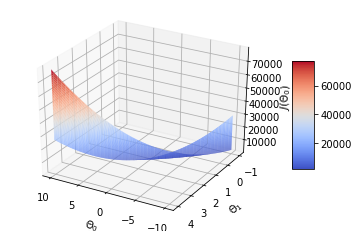

In [101]:
fig = plt.figure()
# figure는 그림을 그리는 캔버스, 하나의 figure에는 여러개의 plot이 들어갈 수 있다.
# figure()함수를 불러 fig에 저장한다.
ax = fig.add_subplot(111, projection='3d')
# subplot 다음의 괄호는 그래프의 위치를 의미하며, 화면을 행렬처럼 구성하겠다는 의미이다.
# 111 = 1 x 1 행렬에 첫번째위치를 의미하며, projection='3d'는 객체가 그래프에 투영될 방법을 정하는 것이다.
surf=ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="coolwarm")
# x축은 theta0_vals, y축은 theta1_vals, z축은 J_vals, cmap='coolwarm'은 3차원 surface의 컬러맵을 의미한다.
fig.colorbar(surf, shrink=0.5, aspect=5)
# surf에 대한 colorbar를 그리는데 속성을 준다.
ax.set_xlabel("$\Theta_0$")
# x축의 이름을 theta0로 한다.
ax.set_ylabel("$\Theta_1$")
# x축의 이름을 theta1로 한다.
ax.set_zlabel("$J(\Theta_0)$")
# x축의 이름을 J(theta0)로 한다.

ax.view_init(30, 120)
# 보는 각도를 정한다.

Text(0.5, 1.0, 'Cost function using Gradient Descent')

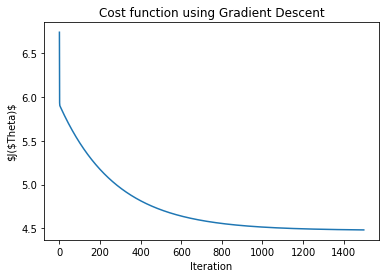

In [107]:
plt.plot(J_history)
# J_history(1500번 반복하여 나온 costfunction의 값)에 있는 값들을 그린다.
plt.xlabel("Iteration")
# x축의 이름을 지정한다.
plt.ylabel("$J($Theta)$")
# y축의 이름을 지정한다.
plt.title("Cost function using Gradient Descent")
# 제목을 지정한다.

Text(0.5, 1.0, 'Profit Prediction')

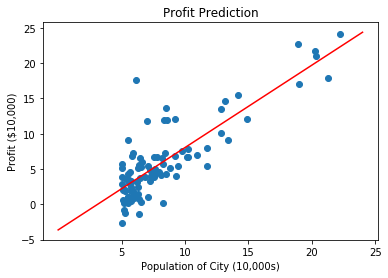

In [110]:
plt.scatter(data[0], data[1])
# data[0]과 data[1]의 값들을 산점도로 표현한다.(각각 97개의 데이터가 있다)
x_value=[x for x in range(25)]
# 0부터 24까지의 값들을 리스트로 만들어 x_value에 저장한다.
y_value=[y*theta[1]+theta[0] for y in x_value]
# 0부터 24까지 차례대로 gradient descent를 통해 나온 theta_1과 곱한후 theta_0를 더해 리스트의 형태로 y_value에 저장한다.
# h(x) = theta_0 + theta_1x를 계산한 것이다.
plt.plot(x_value, y_value, color="r")
# x의 값은 x_value, y의 값은 y_value로 지정하여 라인을 그린다.(색깔은 red)
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

In [117]:
def predict(x, theta):
# predict라는 함수를 정의한다.(매개변수로 x와 theta를 받음)
    predictions=np.dot(theta.transpose(), x)
#   theta.transpose와 x의 내적의 결과를 predictions에 저장한다.
#   theta의 transpose를 하는 이유는 내적을 하기위해 inner dimension을 맞추기 위함이다.
#   predict1를 예로 들면, [1 x 2]과 [2, ]로 되기 때문에 내적을 할 수 있다.
#   그 결과 크기 1의 벡터가 생성된다.
    return predictions[0]
#   predictions의 [0]의 요소를 반환한다.

In [115]:
predict1=predict(np.array([1,3.5]),theta)*10000
# 크기 2인 벡터와 [2 x 1]크기의 theta를 predict함수에 넣어 나온결과에 100000를 곱해 predict1에 저장한다.
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))
# predict2의 결과에 0번째 자리까지 표현하기 위해 소숫점 1번째자리에서 반올림을 한다.

For population = 35,000, we predict a profit of $4520.0


In [53]:
predict2=predict(np.array([1,7]),theta)*10000
# 크기 2인 벡터와 [2 x 1]크기의 theta를 predict함수에 넣어 나온결과에 100000를 곱해 predict2에 저장한다.
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))
# predict2의 결과에 0번째 자리까지 표현하기 위해 소숫점 1번째자리에서 반올림을 한다.

For population = 70,000, we predict a profit of $45342.0


In [55]:
data2=pd.read_csv("Multi_linear.txt", header=None)

In [56]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [57]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


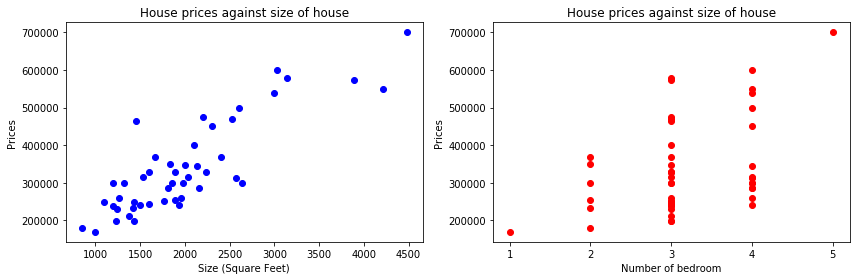

In [125]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
# 1행 2열으로 그림을 그리고, size는 (12, 4)의 크기로 한다.
# fig는 전체 subplot을 의미한다.(전체사이즈)
# ax는 전체 중 낱낱개를 의미한다.
axes[0].scatter(data2[0],data2[2],color="b")
# subplot중 1번째에 data2의 1번째 열과 3번째 열에 대한 산점도를 그린다.
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
# subplot중 2번째에 data2의 2번째 열과 3번째 열에 대한 산점도를 그린다.
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against size of house")

plt.tight_layout()
# 적당히 공백을 잘 배치하여 그림을 나타낸다.

In [82]:
def featureNormalization(X):
# featureNormalization의 함수를 정의한다.(매개변수로는 X를 받음)
    mean=np.mean(X,axis=0)
#   X의 값들 중 열별로 평균을 구해 mean에 저장한다.
#   만약 X가 1차원 배열이라면 배열에 있는 모든 값들의 평균을 구한다.
    std=np.std(X,axis=0)
#   X의 값들 중 열을 따라 계산된 표준 편차를 std에 저장한다.
#   만약 X가 1차원 배열이라면 배열에 있는 모든 값들의 표준 편차를 구한다.
    X_norm = (X - mean)/std
#   (X - mean)/std의 결과를 X_norm에 저장한다.    
    return X_norm , mean , std
#   X_norm, mean, std를 반환한다.

In [173]:
data_n2=data2.values
# data2의 데이터들만 가져와 2차원 배열의 형태(행렬)로 data_n2에 저장한다.[47 x 3]
m2=len(data_n2[:,-1])
# data_n2의 마지막 열(뒤에서 첫번째 열)의 길이(원소의 개수)를 m2에 저장한다.(m2 = 47)
X2=data_n2[:,0:2].reshape(m2,2)
# data_n2의 첫번째 열(0)과 두번째 열(1)을 가져와 [m2 x 2]의 형태로 X2에 저장한다.
X2, mean_X2, std_X2 = featureNormalization(X2)
# featureNormalization에 X2를 넣은 후 나온 결과들을 각각 X2, mean_X2, std_X2에 저장한다.
X2 = np.append(np.ones((m2,1)),X2,axis=1)
# X2는 [m x 2] 크기의 행렬이 되며 x1의 값들은 feature scaling이 된 값들이 되게 된다.
# 그 결과 X2는 [m2 x 3]크기의 행렬이 된다.
y2=data_n2[:,-1].reshape(m2,1)
# data_n2의 마지막 열(3)을 가져와 [m2 x 1]의 형태로 y2에 저장한다.
theta2=np.zeros((3,1))
# [3 x 1]크기의 0으로 가득찬 행렬을 theta2에 저장한다.

In [148]:
computeCost(X2,y2,theta2)
# [m2 x 3]크기의 X2와 [3 x 1]크기의 theta와 [m2 x 1]크기의 y2를 넣어 
# costfunction의 값을 계산한다.

2043280050.602829

In [181]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
# gradient descent의 결과값들을 theta2와 J_history2에 저장한다.
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

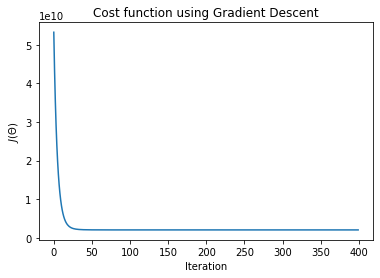

In [182]:
plt.plot(J_history2)
# J_history의 결과값들을 라인으로 그린다.
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [183]:
x_sample = featureNormalization(np.array([1650,3]))[0]
# featureNormalization의 결과 3개가 반환이 되는데 그때 0번째 요소(X_norm)를 x_sample에 저장한다.
# x_sample은 feature scaling한 결과를 가지고 있다.
x_sample=np.append(np.ones(1),x_sample)
# 위에서 계산한 x_sample 앞에 1을 붙인다. 그 결과 x_sample은 크기가 3인 1차원 배열(벡터)가 된다.
predict3=predict(x_sample,theta2)
# 400번을 통해 나온 theta2와 x_sample의 내적의 결과로 예측한 결과값을 predict3에 저장한다.
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
